In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv('../data/housing.csv')

In [2]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
lreg = LinearRegression()

X = df.iloc[:, :-1]
y = df['PRICE']

In [8]:
X -= X.mean()
X /= X.std()

In [10]:
lreg.fit(X, y).score(X, y)

0.7406426641094095

In [11]:
lreg.coef_

array([-0.92906457,  1.08263896,  0.14103943,  0.68241438, -2.05875361,
        2.67687661,  0.01948534, -3.10711605,  2.6648522 , -2.07883689,
       -2.06264585,  0.85010886, -3.74733185])

In [13]:
coeffs = pd.DataFrame({
    'Columns': X.columns,
    'Coefficients': lreg.coef_
})

In [14]:
coeffs

,Columns,Coefficients
0,CRIM,-0.929065
1,ZN,1.082639
2,INDUS,0.141039
3,CHAS,0.682414
4,NOX,-2.058754
5,RM,2.676877
6,AGE,0.019485
7,DIS,-3.107116
8,RAD,2.664852
9,TAX,-2.078837


In [17]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


In [18]:
df['PREDICTION'] = lreg.predict(X)

In [19]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTION
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.003843
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.025562
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.567597
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,28.607036
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,27.943524


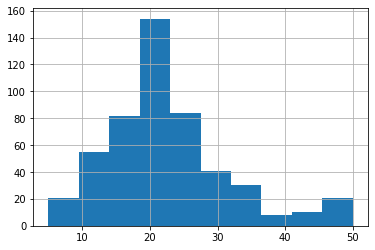

In [20]:
df['PRICE'].hist();

In [29]:
model_cost = np.sum((df['PRICE'] - df['PREDICTION'])**2)

In [30]:
naive_cost = np.sum((df['PRICE'] - df['PRICE'].mean())**2)

In [31]:
1 - (model_cost / naive_cost)

0.7406426641094094

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [33]:
X_train.shape

(404, 13)

In [34]:
X_test.shape

(102, 13)

In [35]:
y_train.shape

(404,)

In [36]:
y_test.shape

(102,)

In [37]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
192,-0.410029,1.442231,-1.121922,-0.272329,-1.015684,1.271483,-1.501833,1.274989,-0.522484,-0.060741,-1.503749,0.370404,-1.369973
138,-0.391060,-0.487240,1.567444,-0.272329,0.598087,-0.608631,1.052444,-1.009846,-0.637331,0.170662,1.267684,0.387382,1.213676
251,-0.395212,0.456057,-0.769170,-0.272329,-1.067462,0.218278,-2.119976,1.710424,-0.292791,-0.464213,0.297683,0.223408,-1.269148
13,-0.346887,-0.487240,-0.436826,-0.272329,-0.144075,-0.477692,-0.240681,0.433325,-0.637331,-0.600682,1.175303,0.440616,-0.615184
256,-0.418314,3.371702,-1.076734,-0.272329,-1.386765,1.664300,-1.221183,1.206746,-0.752178,-0.974487,-1.180415,0.324947,-1.336365


In [50]:
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
lreg.coef_

array([-0.92906457,  1.08263896,  0.14103943,  0.68241438, -2.05875361,
        2.67687661,  0.01948534, -3.10711605,  2.6648522 , -2.07883689,
       -2.06264585,  0.85010886, -3.74733185])

In [39]:
lreg.score(X_test, y_test)

0.7263451459702508

In [46]:
lreg.predict(X_test) - y_test

8      -4.425040
289     2.189497
68      0.188034
211    -1.144155
226    -0.679083
70      1.232674
55     -4.307431
470    -0.174501
409    -7.838966
154     5.963586
344    -2.811588
272     4.089260
310     2.896904
160     5.410975
319     0.523503
454     0.359451
11      2.333641
399     5.322060
413    -4.928903
25     -0.264844
418    -3.175680
153    -2.046767
124     2.009516
108     2.713113
345    -1.109444
103     1.023525
209    -2.110058
129    -0.065549
432     5.018710
106    -1.992342
         ...    
63     -2.487544
239     4.914772
123    -0.167375
64     -9.919610
139    -1.140216
314     1.378926
427     2.788064
102     1.219514
45      3.012378
476     3.546374
80      0.359891
14      0.926360
278     1.392066
505    10.356491
341    -2.717705
497     0.977501
212     1.338903
280    -7.077835
229    -0.252185
203    -6.578622
317    -1.185335
232    -4.224731
327    -2.538481
309     3.145046
269     5.853581
368   -27.615456
144    -2.206052
336     0.8949

In [66]:
train = pd.read_csv('iowa_housing/train.csv')

In [53]:
test = pd.read_csv('iowa_housing/test.csv')

In [54]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,GrLivArea,1stFlrSF,2ndFlrSF,GrLivArea.1,FullBath,HalfBath,GarageType,GarageYrBlt,GarageFinish,GarageCars,SalePrice
0,1,60,RL,8450,CollgCr,7,5,2003,1710,856,854,1710,2,1,Attchd,2003.0,RFn,2,208500
1,2,20,RL,9600,Veenker,6,8,1976,1262,1262,0,1262,2,0,Attchd,1976.0,RFn,2,181500
2,3,60,RL,11250,CollgCr,7,5,2001,1786,920,866,1786,2,1,Attchd,2001.0,RFn,2,223500
3,4,70,RL,9550,Crawfor,7,5,1915,1717,961,756,1717,1,0,Detchd,1998.0,Unf,3,140000
4,5,60,RL,14260,NoRidge,8,5,2000,2198,1145,1053,2198,2,1,Attchd,2000.0,RFn,3,250000


In [55]:
test.head()

,Id,MSSubClass,MSZoning,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,GrLivArea,1stFlrSF,2ndFlrSF,GrLivArea.1,FullBath,HalfBath,GarageType,GarageYrBlt,GarageFinish,GarageCars
0,1461,20,RH,11622,NAmes,5,6,1961,896,896,0,896,1,0,Attchd,1961.0,Unf,1.0
1,1462,20,RL,14267,NAmes,6,6,1958,1329,1329,0,1329,1,1,Attchd,1958.0,Unf,1.0
2,1463,60,RL,13830,Gilbert,5,5,1997,1629,928,701,1629,2,1,Attchd,1997.0,Fin,2.0
3,1464,60,RL,9978,Gilbert,6,6,1998,1604,926,678,1604,2,1,Attchd,1998.0,Fin,2.0
4,1465,120,RL,5005,StoneBr,8,5,1992,1280,1280,0,1280,2,0,Attchd,1992.0,RFn,2.0


In [56]:
test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotArea          0
Neighborhood     0
OverallQual      0
OverallCond      0
YearBuilt        0
GrLivArea        0
1stFlrSF         0
2ndFlrSF         0
GrLivArea.1      0
FullBath         0
HalfBath         0
GarageType      76
GarageYrBlt     78
GarageFinish    78
GarageCars       1
dtype: int64

In [57]:
test['GarageYrBlt']

0       1961.0
1       1958.0
2       1997.0
3       1998.0
4       1992.0
5       1993.0
6       1992.0
7       1998.0
8       1990.0
9       1970.0
10      1999.0
11      1971.0
12      1997.0
13      1975.0
14      1975.0
15      2009.0
16      2009.0
17      2005.0
18      2005.0
19      2003.0
20      2002.0
21      2006.0
22      2005.0
23      2006.0
24      2004.0
25      2004.0
26      1998.0
27      2005.0
28      2009.0
29      2005.0
         ...  
1429    1925.0
1430    1957.0
1431       NaN
1432       NaN
1433       NaN
1434    2005.0
1435    2004.0
1436    1979.0
1437    1978.0
1438    2001.0
1439    1975.0
1440    1958.0
1441    2000.0
1442    2005.0
1443    2005.0
1444    1951.0
1445    1997.0
1446    1977.0
1447    1968.0
1448    1970.0
1449       NaN
1450    1972.0
1451    1969.0
1452    1970.0
1453       NaN
1454       NaN
1455    1970.0
1456    1960.0
1457       NaN
1458    1993.0
Name: GarageYrBlt, Length: 1459, dtype: float64

In [60]:
num_cols = train.select_dtypes(include=np.number).columns.tolist()

In [67]:
train_means = train[num_cols].mean()
train_stds  = train[num_cols].std()

In [68]:
train[num_cols] -= train[num_cols].mean()
train[num_cols] /= train[num_cols].std()

In [64]:
num_cols.remove('SalePrice')

In [69]:
test[num_cols] -= train_means
test[num_cols] /= train_stds

In [70]:
train[num_cols].describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,GrLivArea,1stFlrSF,2ndFlrSF,GrLivArea.1,FullBath,HalfBath,GarageYrBlt,GarageCars
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.379000e+03,1.460000e+03
mean,1.140640e-17,-1.548229e-16,-7.585257e-17,2.644764e-16,4.050033e-16,1.045625e-15,-1.607162e-16,6.298234e-17,-9.064287e-17,-1.607162e-16,8.881784e-17,1.406789e-16,4.042049e-15,-3.041707e-19
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.730272e+00,-8.722639e-01,-9.234128e-01,-3.687150e+00,-4.111561e+00,-3.286697e+00,-2.248350e+00,-2.143438e+00,-7.948909e-01,-2.248350e+00,-2.840849e+00,-7.613598e-01,-3.179710e+00,-2.364630e+00
25%,-8.651360e-01,-8.722639e-01,-2.968890e-01,-7.948791e-01,-5.170227e-01,-5.717268e-01,-7.344969e-01,-7.259069e-01,-7.948909e-01,-7.344969e-01,-1.025689e+00,-7.613598e-01,-7.090465e-01,-1.026506e+00
50%,0.000000e+00,-1.630536e-01,-1.040277e-01,-7.181151e-02,-5.170227e-01,5.735183e-02,-9.793648e-02,-1.956263e-01,-7.948909e-01,-9.793648e-02,7.894700e-01,-7.613598e-01,6.050436e-02,3.116179e-01
75%,8.651360e-01,3.097533e-01,1.086708e-01,6.512561e-01,3.816120e-01,9.513056e-01,4.972332e-01,5.913878e-01,8.728126e-01,4.972332e-01,7.894700e-01,1.227165e+00,9.515633e-01,3.116179e-01
max,1.730272e+00,3.146594e+00,2.051125e+01,2.820459e+00,3.077516e+00,1.282400e+00,7.852884e+00,9.129553e+00,3.935614e+00,7.852884e+00,2.604629e+00,3.215690e+00,1.275585e+00,2.987865e+00


In [72]:
test[num_cols].describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,GrLivArea,1stFlrSF,2ndFlrSF,GrLivArea.1,FullBath,HalfBath,GarageYrBlt,GarageCars
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1381.000000,1458.000000
mean,3.461730,0.011373,-0.069898,-0.014819,-0.019355,0.002979,-0.055983,-0.015759,-0.048163,-0.055983,0.010656,-0.010382,-0.031792,-0.001345
std,0.999315,1.010551,0.496482,1.038912,1.000845,1.006197,0.924042,1.029949,0.963535,0.924042,1.007758,1.000261,1.070533,1.038311
min,1.732644,-0.872264,-0.906381,-3.687150,-4.111561,-3.054932,-2.109429,-1.954606,-0.794891,-2.109429,-2.840849,-0.761360,-3.382223,-2.364630
25%,2.597187,-0.872264,-0.313170,-0.794879,-0.517023,-0.604836,-0.757333,-0.747894,-0.794891,-0.757333,-1.025689,-0.761360,-0.790052,-1.026506
50%,3.461730,-0.163054,-0.111993,-0.071812,-0.517023,0.057352,-0.158833,-0.216320,-0.794891,-0.158833,0.789470,-0.761360,0.020002,0.311618
75%,4.326273,0.309753,0.100255,0.651256,0.381612,0.984415,0.391140,0.568754,0.753691,0.391140,0.789470,1.227165,0.951563,0.311618
max,5.190816,3.146594,4.616967,2.820459,3.077516,1.282400,6.811931,10.172007,3.470582,6.811931,4.419789,3.215690,9.254613,4.325989


In [73]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,GrLivArea,1stFlrSF,2ndFlrSF,GrLivArea.1,FullBath,HalfBath,GarageType,GarageYrBlt,GarageFinish,GarageCars,SalePrice
0,-1.730272,0.073350,RL,-0.207071,CollgCr,0.651256,-0.517023,1.050634,0.370207,-0.793162,1.161454,0.370207,0.789470,1.227165,Attchd,0.992066,RFn,0.311618,208500
1,-1.727900,-0.872264,RL,-0.091855,Veenker,-0.071812,2.178881,0.156680,-0.482347,0.257052,-0.794891,-0.482347,0.789470,-0.761360,Attchd,-0.101506,RFn,0.311618,181500
2,-1.725528,0.073350,RL,0.073455,CollgCr,0.651256,-0.517023,0.984415,0.514836,-0.627611,1.188943,0.514836,0.789470,1.227165,Attchd,0.911061,RFn,0.311618,223500
3,-1.723156,0.309753,RL,-0.096864,Crawfor,0.651256,-0.517023,-1.862993,0.383528,-0.521555,0.936955,0.383528,-1.025689,-0.761360,Detchd,0.789553,Unf,1.649742,140000
4,-1.720785,0.073350,RL,0.375020,NoRidge,1.374324,-0.517023,0.951306,1.298881,-0.045596,1.617323,1.298881,0.789470,1.227165,Attchd,0.870558,RFn,1.649742,250000


In [75]:
pd.get_dummies(train)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,GrLivArea,1stFlrSF,2ndFlrSF,GrLivArea.1,...,Neighborhood_Veenker,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,-1.730272,0.073350,-0.207071,0.651256,-0.517023,1.050634,0.370207,-0.793162,1.161454,0.370207,...,0,0,1,0,0,0,0,0,1,0
1,-1.727900,-0.872264,-0.091855,-0.071812,2.178881,0.156680,-0.482347,0.257052,-0.794891,-0.482347,...,1,0,1,0,0,0,0,0,1,0
2,-1.725528,0.073350,0.073455,0.651256,-0.517023,0.984415,0.514836,-0.627611,1.188943,0.514836,...,0,0,1,0,0,0,0,0,1,0
3,-1.723156,0.309753,-0.096864,0.651256,-0.517023,-1.862993,0.383528,-0.521555,0.936955,0.383528,...,0,0,0,0,0,0,1,0,0,1
4,-1.720785,0.073350,0.375020,1.374324,-0.517023,0.951306,1.298881,-0.045596,1.617323,1.298881,...,0,0,1,0,0,0,0,0,1,0
5,-1.718413,-0.163054,0.360493,-0.794879,-0.517023,0.719540,-0.292045,-0.948366,0.501703,-0.292045,...,0,0,1,0,0,0,0,0,0,1
6,-1.716041,-0.872264,-0.043364,1.374324,-0.517023,1.083743,0.339758,1.374522,-0.794891,0.339758,...,0,0,1,0,0,0,0,0,1,0
7,-1.713669,0.073350,-0.013508,0.651256,0.381612,0.057352,1.093354,-0.143892,1.456967,1.093354,...,0,0,1,0,0,0,0,0,1,0
8,-1.711297,-0.163054,-0.440508,0.651256,-0.517023,-1.333243,0.492000,-0.363764,0.927792,0.492000,...,0,0,0,0,0,0,1,0,0,1
9,-1.708925,3.146594,-0.310264,-0.794879,0.381612,-1.068368,-0.834405,-0.221494,-0.794891,-0.834405,...,0,0,1,0,0,0,0,0,1,0


In [77]:
pd.get_dummies(train['MSZoning'])

,C (all),FV,RH,RL,RM
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
7,0,0,0,1,0
8,0,0,0,0,1
9,0,0,0,1,0
